In [4]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

In [5]:
# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

In [6]:
# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
    # Calculate output values from inputs
     self.output = np.maximum(0, inputs)

In [8]:
# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
    # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
        self.output = probabilities

In [11]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()
# Make a forward pass of our training data through this layer
dense1.forward(X)
# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)
# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)


In [10]:
# Let's see output of the first few samples:
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]


In [12]:
import matplotlib.pyplot as plt

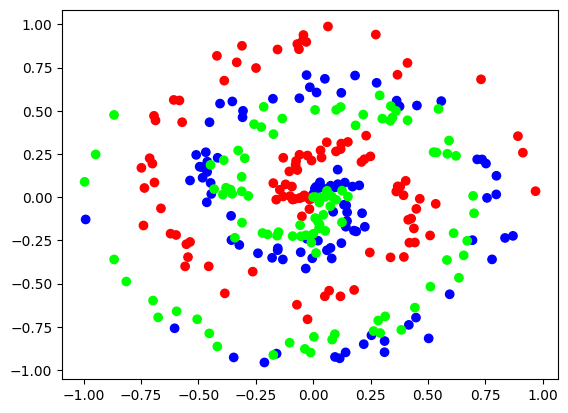

In [18]:
plt.scatter(X[:,0] ,X[:,1], c=y ,cmap ='brg')